In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../data/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


1. cabin, embarked 변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 charactor, factor형으로 변환하시오.
또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고 age 변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


"" -> NA로 변환

In [3]:
df[['cabin', 'embarked']].replace("", np.nan)

,cabin,embarked
0,B5,S
1,C22 C26,S
2,C22 C26,S
3,C22 C26,S
4,C22 C26,S
...,...,...
1304,NaN,C
1305,NaN,C
1306,NaN,C
1307,NaN,C


survived -> factor, name -> charactor, ticket -> charctor로 변환 

In [14]:
df['survived'] =df['survived'].astype('category')
df[['name', 'ticket']] = df[['name', 'ticket']].astype('str')
df.dtypes

pclass         int64
survived    category
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
dtype: object

수치형 변수가 NA인 값을 중앙값, 범주형 변수가 NA인 값을 최빈값으로 대체

In [16]:
df.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [19]:
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].mean())
df['cabin'] = df['cabin'].fillna(df['cabin'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

age 변수를 구간화 하여 새로운 변수 생성

In [27]:
bins = [0,10,20,30,40,50,60,70,80,90]
labels = [0,1,2,3,4,5,6,7,8]
df['age_1'] = pd.cut(df['age'], bins, right=False,labels=labels)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,2


2. 전처리가 완료된 데이터를 train(70%), test(30%) 데이터로 분할하시오. (set.seed(12345)) 를 실행한 후 데이터를 분할하시오. 또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측하는 분류모델을 3개이상 생성하고, test데이터에 대한 예측값을 csv파일로 각각 제출하시오.

In [32]:
from sklearn.model_selection import train_test_split

X = df[['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']]
y = df['survived']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=12345)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(916, 7) (393, 7)
(916,) (393,)


속도 측면에서 LinearRegressor, 정확도 측면에서 XGBoost를 선택하였고, RandomForest를 이용하여 추가 모델링을 진행함

In [50]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import time

lr = LogisticRegression()
xgb = XGBClassifier()
rf = RandomForestClassifier()

def model_result(model,csv_name):
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    
    print(f"{end-start : .5f} sec")
    pred = model.predict(X_test)
    pred_data = pd.DataFrame(pred, columns=['prediction'])
    pred_data.to_csv('{}_predict.csv'.format(csv_name))


In [51]:
model_result(lr,'LogisticRegression')

 0.01921 sec


c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
model_result(xgb,'XGb')

 0.07932 sec


In [53]:
model_result(rf,'RandomForestClassifier')

 0.13900 sec


속도 측면에서는 losgisticregression이 빠른것을 확인함

3. 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또, ROC curve를 그리고 AUC값을 산출하시오.

0.7569340128755364


c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


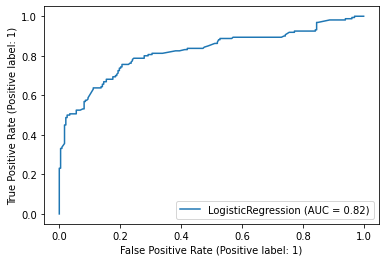

In [54]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

# LogisticRegression
lr_pred = lr.predict(X_test)
print(roc_auc_score(y_test, lr_pred))
plot_roc_curve(lr, X_test, y_test)
plt.show()

0.7637473175965666


c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


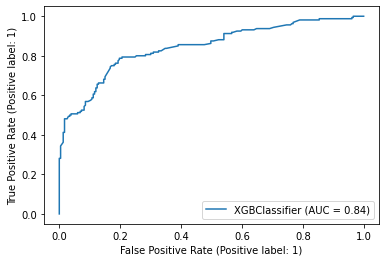

In [57]:
xgb_pred = xgb.predict(X_test)
print(roc_auc_score(y_test, xgb_pred))
plot_roc_curve(xgb, X_test, y_test)
plt.show()

0.7370171673819742


c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


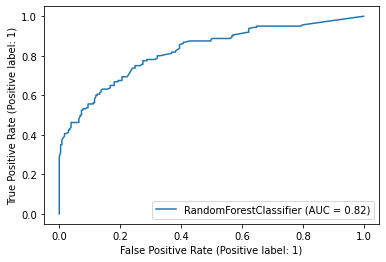

In [58]:
rf_pred = rf.predict(X_test)
print(roc_auc_score(y_test, rf_pred))
plot_roc_curve(rf, X_test, y_test)
plt.show()

생성된 세 모델의 정확도는 xgb, logisticregression, randomforestclassifier 순서대로 높았으며, 큰 차이는 없지만 AUC값 또한 xgb가 가장 높았다. 